# Titanic EDA

## Summary

1. **Setup**  
2. **Data loading  overview**  
3. **Missing value analysis**  
4. **Univariate analysis**  
5. **Bivariate analysis**  
6. **Correlation matrix**  
7. **Summary and next steps**

## 1/ Setup

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

## 2/ Data loading and overview

In [3]:
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')
print(f"Train shape: {train.shape}, Test shape: {test.shape}")

Train shape: (891, 12), Test shape: (418, 11)


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()
train.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## 3/ Missing value analysis

In [11]:
missing_pct = train.isna().mean() * 100
missing_pct.sort_values(ascending=False).round(2)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


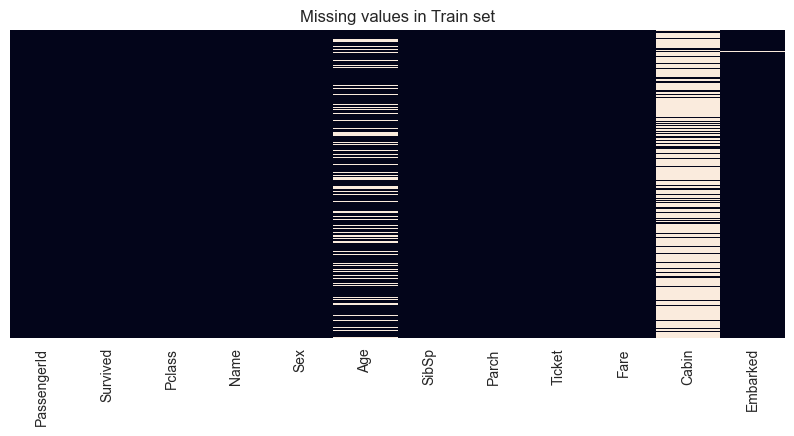

In [13]:
plt.figure(figsize=(10,4))
sns.heatmap(train.isna(), cbar=False, yticklabels=False)
plt.title("Missing values in Train set")
plt.show()

**Observations**  
- **Age** ~20% missing → candidate for median imputation  
- **Cabin** ~77% missing → drop  
- **Embarked** ~0.2% missing → impute with most frequent port  

## 4/ Univariate distributions

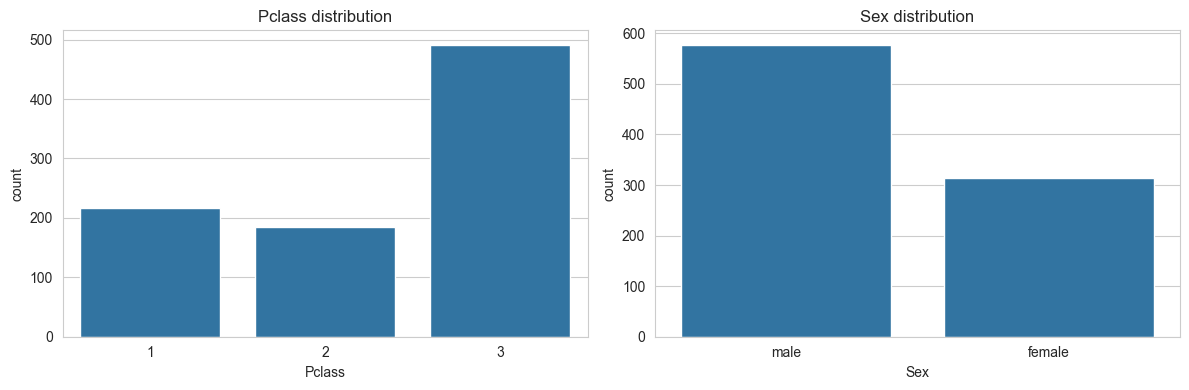

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.countplot(x="Pclass", data=train, ax=axes[0]).set_title("Pclass distribution")
sns.countplot(x="Sex",    data=train, ax=axes[1]).set_title("Sex distribution")

plt.tight_layout()
plt.show()

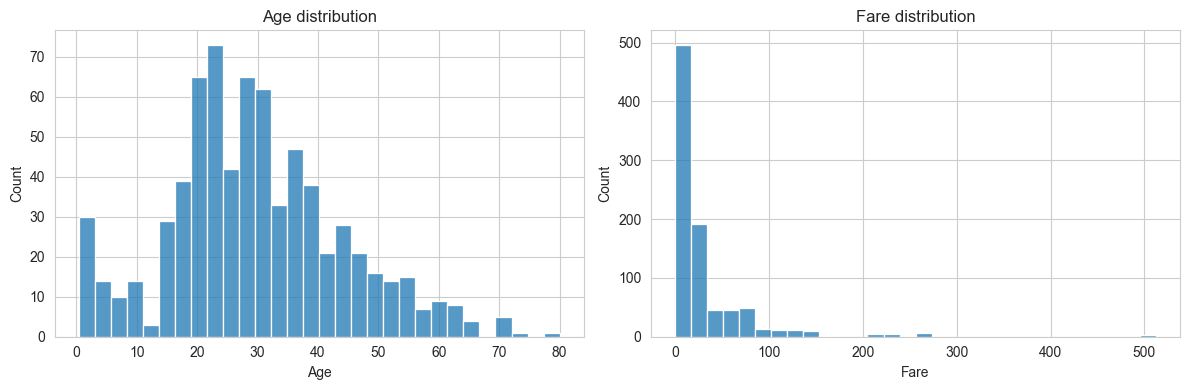

In [18]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.histplot(train["Age"].dropna(), bins=30, ax=axes[0]).set_title("Age distribution")
sns.histplot(train["Fare"], bins=30, ax=axes[1]).set_title("Fare distribution")

plt.tight_layout()
plt.show()

We see skew in **Age** (young passengers) and **Fare** (long right tail).

## 5/ Bivariate analysis (vs. survived)

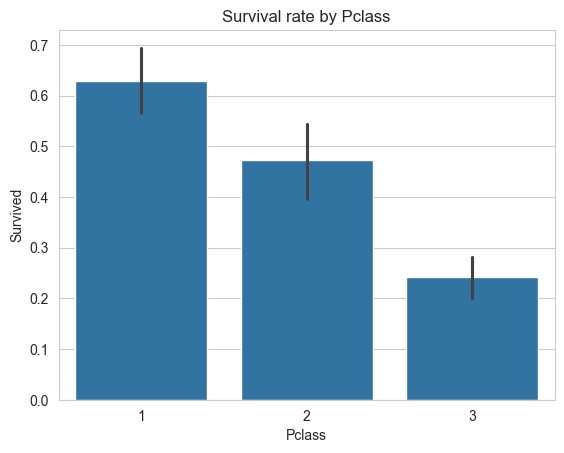

In [20]:
sns.barplot(x="Pclass", y="Survived", data=train).set_title("Survival rate by Pclass")
plt.show()

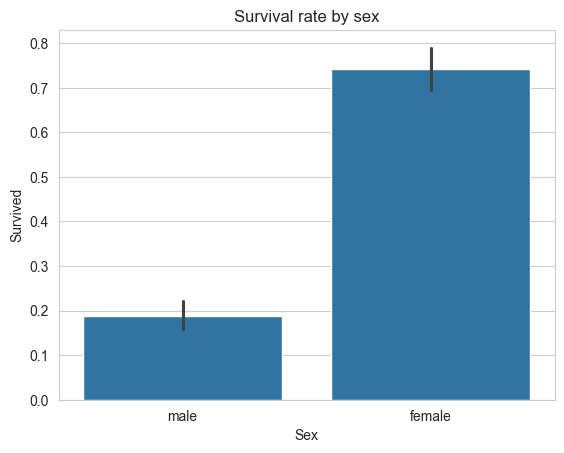

In [21]:
sns.barplot(x="Sex", y="Survived", data=train).set_title("Survival rate by sex")
plt.show()

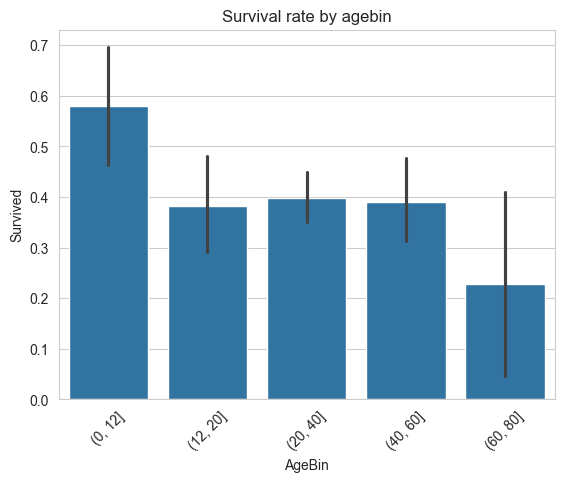

In [19]:
train["AgeBin"] = pd.cut(train["Age"], bins=[0,12,20,40,60,80])
sns.barplot(x="AgeBin", y="Survived", data=train).set_title("Survival rate by agebin")
plt.xticks(rotation=45)
plt.show()

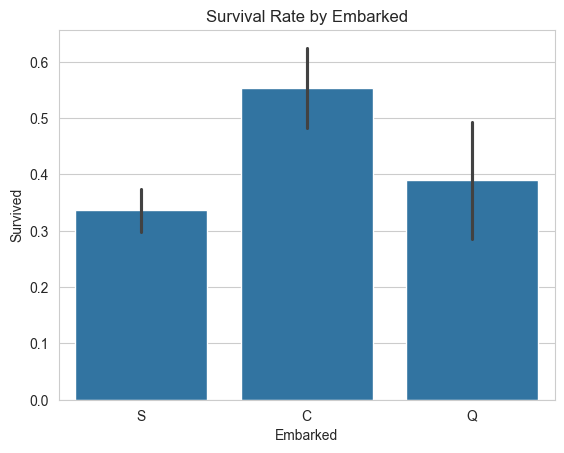

In [22]:
sns.barplot(x="Embarked", y="Survived", data=train).set_title("Survival Rate by Embarked")
plt.show()

**Key takeaways**  
- 1st class → much higher survival  
- Females → far higher survival than males  
- Very young children (0–12) have elevated survival  
- Port “C” passengers slightly better off than “S” or “Q”

## 6/ Correlation matrix

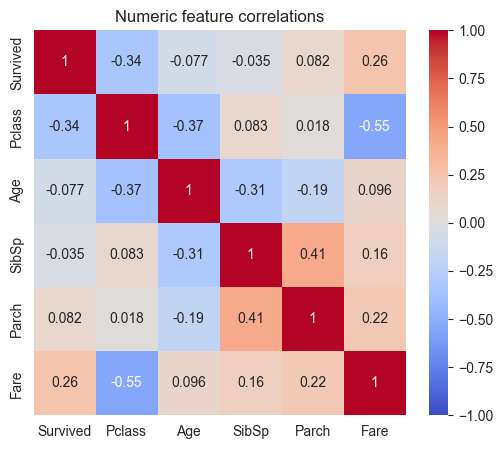

In [24]:
num_cols = ["Survived","Pclass","Age","SibSp","Parch","Fare"]
corr = train[num_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Numeric feature correlations")
plt.show()

Looking at the Pearson correlations between our numeric predictors and `Survived`:

| Feature | Corr with Survived | Interpretation |
| :------ | -----------------: | :------------- |
| **Pclass** | –0.34 | Strongest negative: being in a lower class (3rd) greatly reduces survival probability. |
| **Fare**   | +0.26 | Higher fare → higher chance of survival (wealth/status proxy). |
| **Age**    | –0.08 | Slight negative trend: older passengers marginally less likely to survive. |
| **Parch**  | +0.08 | Small positive: traveling with parents/children gives a tiny survival boost. |
| **SibSp**  | –0.04 | Essentially no linear relationship between sibling/spouse count and survival. |

> **Key takeaway:**  
> - **Pclass** and **Fare** are by far the strongest linear signals for survival.  
> - **Age**, **Parch** and **SibSp** show only weak linear effects and will likely benefit from binning or interaction features in our pipeline.

## 7/ Summary and next steps

- **Missing data** strategy confirmed (Age median, drop Cabin, mode Embarked).  
- **Feature importance**: Sex, Pclass, Age, Fare, Embarked, SibSp/Parch.  
- **Feature engineering ideas**:  
  - Extract title from **Name** (Mr/Miss/Master)  
  - Family size = SibSp + Parch + 1  
  - Deck from **Cabin** first letter (for future data)  
- **Prepare pipeline** in `src/features.py` to implement these imputations  
- **Train & evaluate** final model (we did that already in `train.py` / `evaluate.py`).